# About Data :
Within the excel file ‘Losses’ are daily claims (values, as at the time of the loss), by loss cause, between 1st January 1999 to 29 December 2007 for one portfolio of a UK insurance company. 

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**The first step to any kind of exploration and modelling requires us to load the data file into the environment.**

In [2]:
# Reading dataset using read_excel method
data_df = pd.read_excel('Losses.xlsx')

**Let's Check the dimensions of this data**

In [3]:
# Checking 
data_df.shape
print("Number of rows: "+str(data_df.shape[0]))
print("Number of columns: "+str(data_df.shape[1]))

Number of rows: 47565
Number of columns: 6


**Let's take a look at the top 5 rows of the data to understand what this file contains.**

In [4]:
# The .head() function helps us to show top 5 records
data_df.head()

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
0,1,January,1,1999,WINDSTORM,477.88
1,1,January,1,1999,FIRE,700.00
2,1,January,1,1999,WINDSTORM,99.87
3,1,January,1,1999,WINDSTORM,139.80
4,1,January,1,1999,WINDSTORM,548.66


**To understand the data better that we are going to deal with we would like to have a look at the basic numerical stats of the data like the mean, maximum etc. columnwise.**

In [5]:
# The .describe() function helps us.
data_df.describe()

,DAY,MONTH_ID,YEAR,GROSS INCURRED AMOUNT
count,47565.000000,47565.000000,47565.000000,47565.000000
mean,15.182802,6.379270,2004.335583,1072.416586
std,9.224491,3.579773,2.463259,3997.920914
min,1.000000,1.000000,1999.000000,-31989.780000
25%,7.000000,3.000000,2002.000000,158.630000
50%,15.000000,7.000000,2005.000000,400.000000
75%,23.000000,10.000000,2006.000000,888.610000
max,31.000000,12.000000,2007.000000,249499.510000


**describe() method** deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.


In [6]:
#datatypes of all present attributes in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47565 entries, 0 to 47564
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DAY                    47565 non-null  int64  
 1   MONTH                  47565 non-null  object 
 2   MONTH_ID               47565 non-null  int64  
 3   YEAR                   47565 non-null  int64  
 4   CAUSE                  47565 non-null  object 
 5   GROSS INCURRED AMOUNT  47565 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [7]:
#number of distinct elements in each attribute
data_df.nunique(axis=0)

DAY                         31
MONTH                       12
MONTH_ID                    12
YEAR                         9
CAUSE                        8
GROSS INCURRED AMOUNT    19865
dtype: int64

**Checking the Null Values in the data set**

In [8]:
# using .isnull().sum()

data_df.isnull().sum()

DAY                      0
MONTH                    0
MONTH_ID                 0
YEAR                     0
CAUSE                    0
GROSS INCURRED AMOUNT    0
dtype: int64

**Checking duplicate entry in the data set**

In [9]:
# using .duplicated().sum()

data_df.duplicated().sum()

3264

**In our dataset 3264 duplicate entry is present. So first we remove it.**

In [10]:
data_df.drop_duplicates(inplace = True)

## Now we will first solve the given three problems and then make our model. 

#### Q1. What are the total claims by year and what trends are there? What could be driving these trends?

**a -What are the total value of claims by year?**

In [11]:
year = []
total_values=[]
for i in data_df['YEAR'].unique():
    total_value =data_df.loc[data_df['YEAR'] == i, 'GROSS INCURRED AMOUNT'].sum()
    year.append(i)
    total_values.append(total_value.round(2))
'''    print("--------------------------------------------")
    print("Year", i)
    print("Total claims in this year", total_value)'''
dict = {'YEAR': year, 'GROSS INCURRED AMOUNT': total_values}
df = pd.DataFrame(dict)
df

,YEAR,GROSS INCURRED AMOUNT
0,1999,1504421.74
1,2000,3326081.57
2,2001,3535301.70
3,2002,3262541.63
4,2003,3135699.13
5,2004,4022203.93
6,2005,6230756.87
7,2006,9818361.64
8,2007,15181791.84


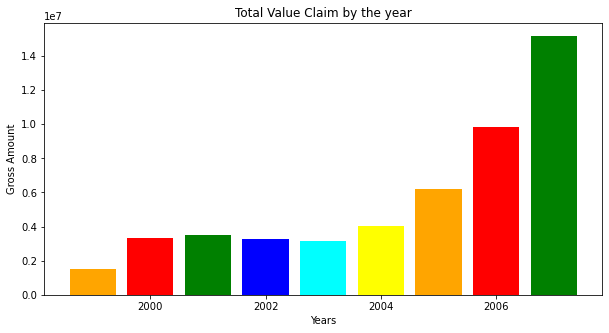

In [12]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df['YEAR'], df['GROSS INCURRED AMOUNT'], color=['orange', 'red', 'green', 'blue', 'cyan','yellow'])
 
plt.xlabel("Years")
plt.ylabel("Gross Amount")
plt.title("Total Value Claim by the year")
plt.show()

**What factors, internal and external to the insurer, could be driving any trends that you have identified?**

In [13]:
total_values = []
cause=[]
for i in data_df['CAUSE'].unique():
    total_value =data_df.loc[data_df['CAUSE'] == i, 'GROSS INCURRED AMOUNT'].sum()
    #print("--------------------------------------------")
    #print("CAUSE:", i)
    cause.append(i)
    total_values.append(total_value.round(2))
    #print("Total claims with this cause:", total_value.round(2))
dict = {'CAUSE': cause, 'GROSS INCURRED AMOUNT': total_values}
df1 = pd.DataFrame(dict)
df1

,CAUSE,GROSS INCURRED AMOUNT
0,WINDSTORM,8751596.65
1,FIRE,7050611.03
2,ESCAPE OF WATER,3405456.11
3,SUBSIDENCE,4773181.49
4,FLOOD,9449495.10
5,ACCIDENTAL DAMAGE,8681913.23
6,THEFT,7156159.83
7,EARTHQUAKE,748746.61


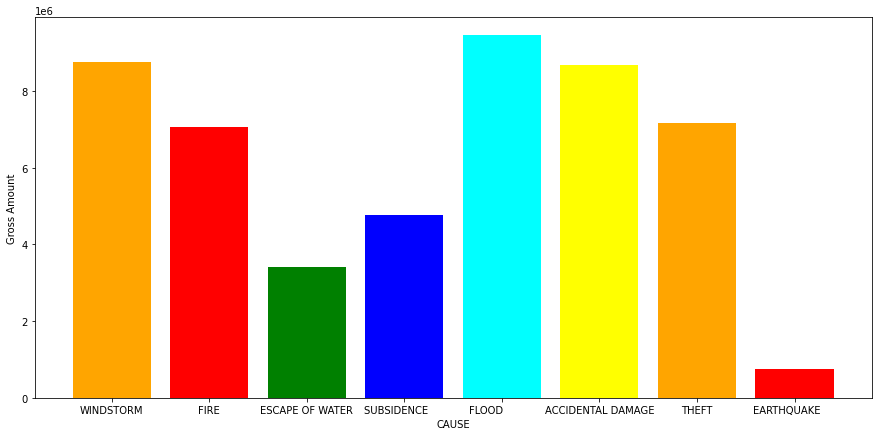

In [14]:
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(df1['CAUSE'], df1['GROSS INCURRED AMOUNT'],color=['orange', 'red', 'green', 'blue', 'cyan','yellow'])
 
plt.xlabel("CAUSE")
plt.ylabel("Gross Amount")
plt.show()

## Q2. Which perils should the company worry about most and why?

**Which claim types (perils) have the greatest average annual frequency and severity?**

In [15]:
values = []
causes = []
years = []
for c in cause:
    for i in year:
        total_value =data_df.loc[(data_df['YEAR'] == i) & (data_df['CAUSE']==c), 'GROSS INCURRED AMOUNT'].sum()
        values.append(total_value.round(2))
        causes.append(c)
        years.append(i)

dict = {'YEAR': years, 'CAUSE': causes, 'CLAIM': values} 
    
df2 = pd.DataFrame(dict)
    
df2

,YEAR,CAUSE,CLAIM
0,1999,WINDSTORM,246231.81
1,2000,WINDSTORM,835995.03
2,2001,WINDSTORM,267578.93
3,2002,WINDSTORM,607295.50
4,2003,WINDSTORM,147543.13
...,...,...,...
67,2003,EARTHQUAKE,0.00
68,2004,EARTHQUAKE,0.00
69,2005,EARTHQUAKE,0.00
70,2006,EARTHQUAKE,0.00


In [16]:
print(df2[['YEAR', 'CAUSE','CLAIM']].sort_values('CLAIM', ascending=False).head(1))

   YEAR      CAUSE       CLAIM
8  2007  WINDSTORM  4622355.53


#### Here we get that WINDSTROME has greatest average annual claims: 5178311.62 in the year 2007.  


**What is the average individual claim size by peril across the 9-year time period?**

In [17]:
cause_2 = []
total_value2 = []
for c in causes:
    total_value =data_df.loc[data_df['CAUSE'] == c, 'GROSS INCURRED AMOUNT'].sum()
    cause_2.append(c)
    total_value2.append(total_value.round(2))

dict = {'CAUSE': cause_2, 'CLAIM': total_value2}
df3 = pd.DataFrame(dict)

# Calculating average
result = df3.groupby('CAUSE')['CLAIM'].mean()

# Display result
result.round(2)


CAUSE
ACCIDENTAL DAMAGE    8681913.23
EARTHQUAKE            748746.61
ESCAPE OF WATER      3405456.11
FIRE                 7050611.03
FLOOD                9449495.10
SUBSIDENCE           4773181.49
THEFT                7156159.83
WINDSTORM            8751596.65
Name: CLAIM, dtype: float64

### Q3. What did Windstorm Erwin cost the company? What perils drove the loss?

**What was the total loss, for windstorm and other related weather perils, for Windstorm Erwin (date Jan 7th to Jan 9th, 2005)**


In [18]:
options = ['FLOOD','WINDSTORM','SUBSIDENCE']
df3 = data_df.loc[(data_df['MONTH']=='January') & (data_df['DAY']<9) & (data_df['DAY']>7) & (data_df['CAUSE'].isin(options))]
df3

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
1947,8,January,1,2000,WINDSTORM,350.00
5221,8,January,1,2001,WINDSTORM,595.00
5223,8,January,1,2001,WINDSTORM,528.75
5224,8,January,1,2001,WINDSTORM,998.75
5226,8,January,1,2001,WINDSTORM,130.00
...,...,...,...,...,...,...
36526,8,January,1,2007,WINDSTORM,114.00
36528,8,January,1,2007,WINDSTORM,264.38
36529,8,January,1,2007,WINDSTORM,1811.20
36531,8,January,1,2007,WINDSTORM,176.00


In [19]:
result_weather = df3.groupby('CAUSE')['GROSS INCURRED AMOUNT'].sum()
print(result_weather)

CAUSE
WINDSTORM    205524.31
Name: GROSS INCURRED AMOUNT, dtype: float64


# NOW WE WILL MAKE OUR MODEL FOR PREDICTION

### Transformation of categorical attributes

In [20]:
# Converting object data type into numeric data type using Label Encoder.

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data_df['MONTH'] = lb.fit_transform(data_df['MONTH'])
data_df['CAUSE'] = lb.fit_transform(data_df['CAUSE'])

**Lets try to understand what this data is all about.**

### Data Visualisation-
Since this is a classification problem it would be important and interesting to the distribution of target variables for the data.

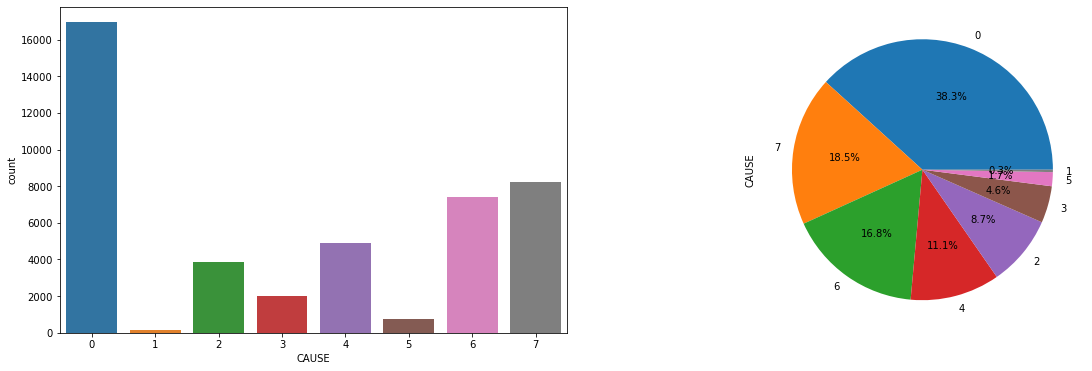

In [21]:
fig, ax=plt.subplots(1,2,figsize=(20,6))
_ = sb.countplot(x='CAUSE', data=data_df, ax=ax[0])
_ = data_df['CAUSE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

**So there are 8 classes of CAUSE for which insurance is claims. We can see that the distribution of the classes is disbalanced. 'ACCIDENTAL DAMAGE' class is in majority while 'EARTHQUAKE' class is the minority here.**

##### Let's check the distribution of data using Histogram and Density visualisation method.¶

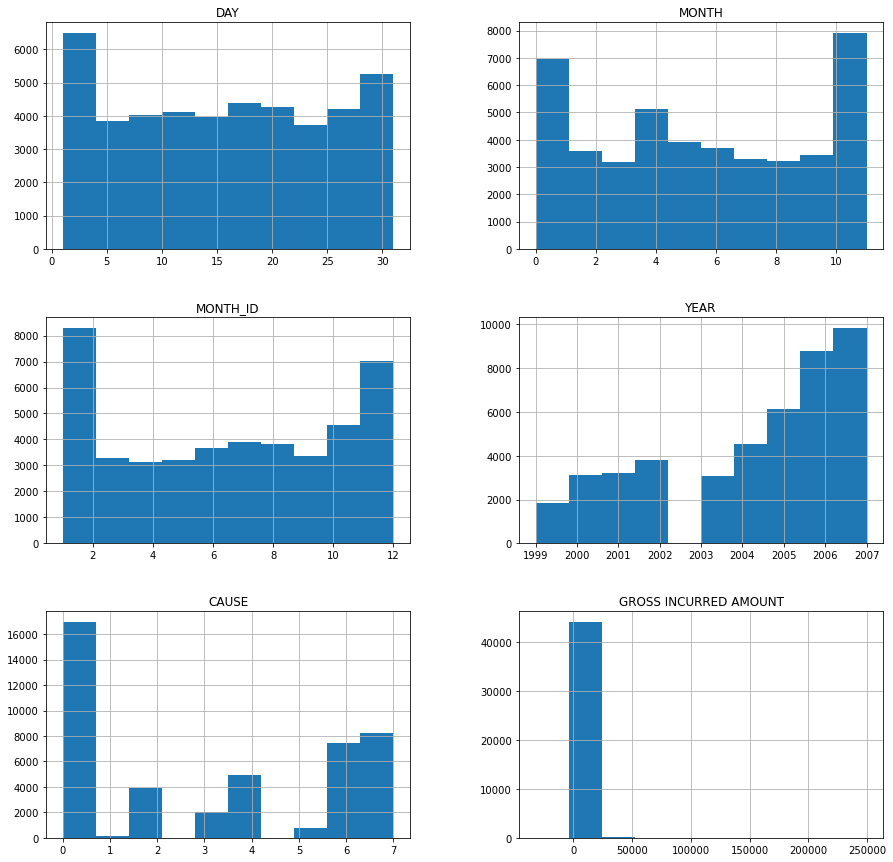

In [22]:
data_df.hist(figsize=(15,15))
plt.show()

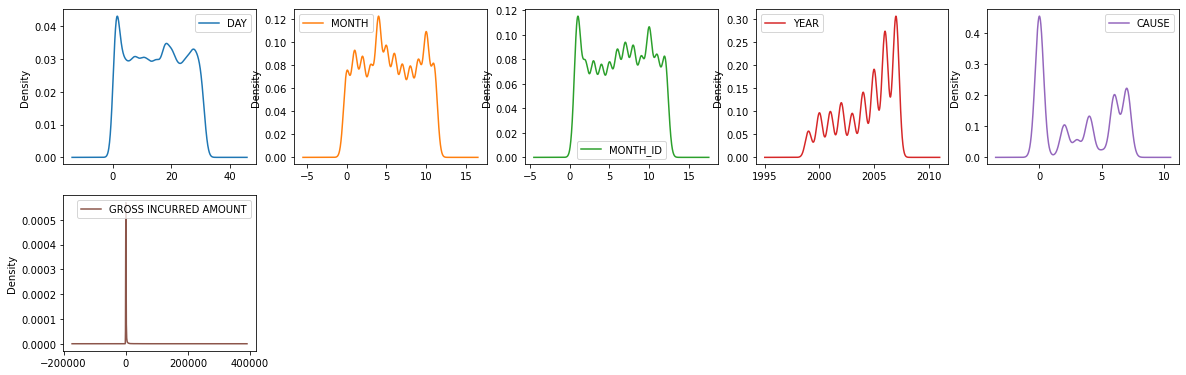

In [23]:
data_df.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(20,20))
plt.show()

**Checking the coorellation**

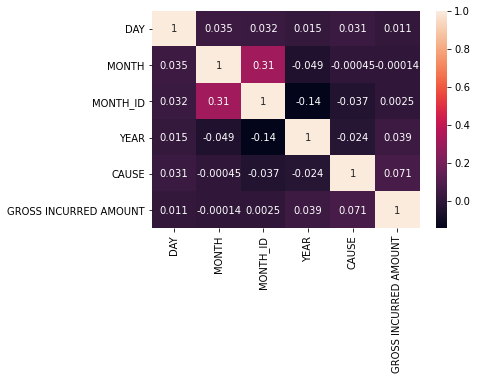

In [24]:
# coorelation between the featues and target

sb.heatmap(data_df.corr(),annot = True)
plt.show()

**Now we will take features and target in seprate variable as an input X and output Y**

In [25]:
# Defining Input and target
X = data_df.drop('CAUSE',axis=1)
Y = data_df['CAUSE']

### Train-Test-Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

**As we know that before giving data to machine we need to change unit of all data.**

In [27]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
X_train =  ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [28]:
X_train.shape

(35440, 5)

In [29]:
X_test.shape

(8861, 5)

In [30]:
Y_train.shape

(35440,)

In [31]:
#! pip install imblearn

In [32]:
from imblearn.over_sampling import SMOTE

X_train1,Y_train1 = SMOTE().fit_resample(X_train,Y_train)
X_test1,Y_test1 = SMOTE().fit_resample(X_test,Y_test)
X_train.shape, Y_train.shape

((35440, 5), (35440,))

In [33]:
Y_test1.value_counts()

0    3398
1    3398
2    3398
3    3398
4    3398
5    3398
6    3398
7    3398
Name: CAUSE, dtype: int64

### Creating a Model Function

In [34]:
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred = model.predict(X_test1)
    
    print(classification_report(Y_test1, Y_pred))
    
    print("Confusion Matrix",confusion_matrix(Y_test1,Y_pred))
    print("Model Accuracy: ",model.score(X_test1,Y_test1))
    return model

from sklearn.metrics import classification_report,confusion_matrix


# 1-Using a Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.23      0.29      0.26      3398
           1       0.69      0.96      0.80      3398
           2       0.27      0.52      0.36      3398
           3       0.20      0.04      0.06      3398
           4       0.27      0.48      0.35      3398
           5       0.39      0.33      0.36      3398
           6       0.16      0.03      0.05      3398
           7       0.19      0.09      0.12      3398

    accuracy                           0.34     27184
   macro avg       0.30      0.34      0.29     27184
weighted avg       0.30      0.34      0.29     27184

Confusion Matrix [[ 984  233  756   20  934  199   77  195]
 [  14 3273   31    0    0    0   16   64]
 [ 583   54 1772  102  314  289   74  210]
 [ 582  175 1018  123  701  522   71  206]
 [ 621  319  151   71 1626  337  101  172]
 [ 228  315  625  199  584 1122  125  200]
 [ 704  245  947   51  870  265   99  217]
 [ 585  135 1148   44  991  155

# 2- Decision Tree Classifier with Gini

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.26      0.32      0.29      3398
           1       0.96      0.95      0.95      3398
           2       0.25      0.23      0.24      3398
           3       0.25      0.27      0.26      3398
           4       0.31      0.29      0.30      3398
           5       0.40      0.32      0.36      3398
           6       0.19      0.19      0.19      3398
           7       0.41      0.41      0.41      3398

    accuracy                           0.37     27184
   macro avg       0.38      0.37      0.37     27184
weighted avg       0.38      0.37      0.37     27184

Confusion Matrix [[1104    6  398  210  526   87  641  426]
 [   7 3238   11   20    1   81    5   35]
 [ 581   16  775  652  192  355  492  335]
 [ 403   36  506  924  342  475  427  285]
 [ 625   18  192  418  969  319  516  341]
 [ 236   46  416  737  350 1098  308  207]
 [ 797   19  451  484  447  199  636  365]
 [ 568    8  322  284  332  121

# 2.1 Decision Tree Classifier : Pruning Technique : max_depth

In [37]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=8) #bydefault gini
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.27      0.43      0.34      3398
           1       0.96      0.96      0.96      3398
           2       0.30      0.55      0.39      3398
           3       0.28      0.08      0.13      3398
           4       0.31      0.50      0.39      3398
           5       0.43      0.52      0.47      3398
           6       0.29      0.01      0.01      3398
           7       0.64      0.30      0.41      3398

    accuracy                           0.42     27184
   macro avg       0.44      0.42      0.39     27184
weighted avg       0.44      0.42      0.39     27184

Confusion Matrix [[1465   14  846   57  654  219   19  124]
 [  11 3257   24    0   69   37    0    0]
 [ 627   27 1861  156  120  496   11  100]
 [ 559    7 1064  286  769  632    1   80]
 [ 920   11  184   65 1707  386    8  117]
 [ 199   54  406  320  610 1780    2   27]
 [ 950   20 1053  105  862  276   22  110]
 [ 613    5  800   43  642  275

# 2.2 Decision Tree Classifier : Pruning Technique :min_samples_leaf

In [38]:
df2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=87)
df2 = create_model(df2)

              precision    recall  f1-score   support

           0       0.30      0.27      0.29      3398
           1       0.94      0.95      0.95      3398
           2       0.29      0.34      0.31      3398
           3       0.26      0.28      0.27      3398
           4       0.32      0.37      0.34      3398
           5       0.40      0.54      0.46      3398
           6       0.22      0.11      0.14      3398
           7       0.54      0.44      0.48      3398

    accuracy                           0.41     27184
   macro avg       0.41      0.41      0.41     27184
weighted avg       0.41      0.41      0.41     27184

Confusion Matrix [[ 931   19  678  263  636  211  378  282]
 [   2 3242    1   11    5  135    0    2]
 [ 328    9 1143  710  115  571  271  251]
 [ 282   24  484  963  510  754  229  152]
 [ 460   63  199  414 1252  527  221  262]
 [  90   34  343  650  336 1829   28   88]
 [ 607   40  641  510  647  336  361  256]
 [ 356   28  466  249  363  248

# 3 Decision Tree Classifier with Entropy

In [39]:

dt_entropy = DecisionTreeClassifier(random_state=1, criterion='entropy')   

# Criterion should be entropy if you want to calculate with Entropy other wise by default it take Gini Index

dt_entropy = create_model(dt_entropy)

              precision    recall  f1-score   support

           0       0.25      0.32      0.28      3398
           1       0.96      0.95      0.95      3398
           2       0.24      0.20      0.22      3398
           3       0.26      0.31      0.29      3398
           4       0.30      0.27      0.29      3398
           5       0.41      0.34      0.37      3398
           6       0.19      0.19      0.19      3398
           7       0.42      0.42      0.42      3398

    accuracy                           0.38     27184
   macro avg       0.38      0.38      0.38     27184
weighted avg       0.38      0.38      0.38     27184

Confusion Matrix [[1075    6  412  219  524   83  650  429]
 [   6 3235    9   39    4  101    1    3]
 [ 569   20  694  747  167  364  518  319]
 [ 422   31  458 1055  337  476  362  257]
 [ 600   18  211  413  928  316  535  377]
 [ 220   51  360  779  351 1139  313  185]
 [ 799   19  437  468  469  203  647  356]
 [ 541    4  327  285  332  118

# 4. Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier(random_state=1)
rfc = create_model(rfc)

In [ ]:
'''for i in range(1,9):
    rfc1 = RandomForestClassifier(random_state=1, max_depth=i)
    print("Max_depth: ", i)
    
    rfc1  = create_model(rfc1)'''

In [ ]:

rfc1 = RandomForestClassifier(random_state=1, max_depth=8)
rfc1  = create_model(rfc1)

# 5. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
'''for i in range(1,14):
    ada = AdaBoostClassifier(n_estimators=i, random_state=1)
    
    print("No of Decision Stump: ", i)
    
    ada = create_model(ada)'''

In [ ]:
ada = AdaBoostClassifier(n_estimators=10, random_state=1)


ada = create_model(ada)

# 5. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

'''for i in range(10,101):
    gbc = GradientBoostingClassifier(n_estimators=99, random_state=1)  # n_estimators >=10 and <=100
    print("Esimators: ", i)
    
    gbc = create_model(gbc)'''

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=99, random_state=1)  # n_estimators >=10 and <=100

gbc = create_model(gbc)

In [ ]:
#!pip install xgboost

# 6. XGBClassifier

In [ ]:
from xgboost import XGBClassifier
'''for i in range(10,100):
    xgc = XGBClassifier(n_estimators= i,reg_alpha =1, random_state =1)
    
    xgc = create_model(xgc)'''

In [ ]:
xgc = XGBClassifier(n_estimators= 90,reg_alpha =1, random_state =1)

xgc = create_model(xgc)


# 7. Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=1) 
svc = create_model(svc)

In [ ]:
svc1 = LinearSVC(random_state=1,C = 0.9)
svc1 = create_model(svc1)

In [ ]:
from sklearn.svm import SVC 
poly_svc = SVC(random_state=1,kernel='poly')
poly_svc = create_model(poly_svc)

In [ ]:
r_svc = SVC(random_state=1, kernel='rbf')
r_svc = create_model(r_svc)